<a href="https://colab.research.google.com/github/Eduardo757/MVPPUCRIO3/blob/main/MVP_PUCRIO3_EDUARDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = '10'> MVP Sprint 3: Engenharia de Dados




<i>Eduardo Vasconcelos Sampaio

PUC-RIO


<font size = '08'> Objetivo

A partir de uma base de dados com estatiticas dos jogadores da NBA( Liga Americana de Basquete ) definir as seguintes perguntas :



*   Quais são as equipes com a melhor e a pior média de percentual de arremesso de campo?
  - Identificar as equipes mais eficazes ofensivamente.
*   Quais são as equipes com a melhor média de pontos na temporada?
  - Avaliar a precisão e eficiência das equipes nos arremessos de campo.

* Como se comparam as equipes em termos de classificação média dos jogadores?
 - Identificar equipes com jogadores de alto desempenho individual.
 <br><br>


 Com isso iremos pesquisar dados da ultima temporada da liga, afim de obter as respostas e entendermos perpectivas para
 a proxima temporada.



<font size = '08'> Busca pelos Dados

No seguinte link : https://www.basketball-reference.com/leagues/NBA_2024_per_game.html#per_game_stats, iremos utilizar os dados por jogo dos jogadores

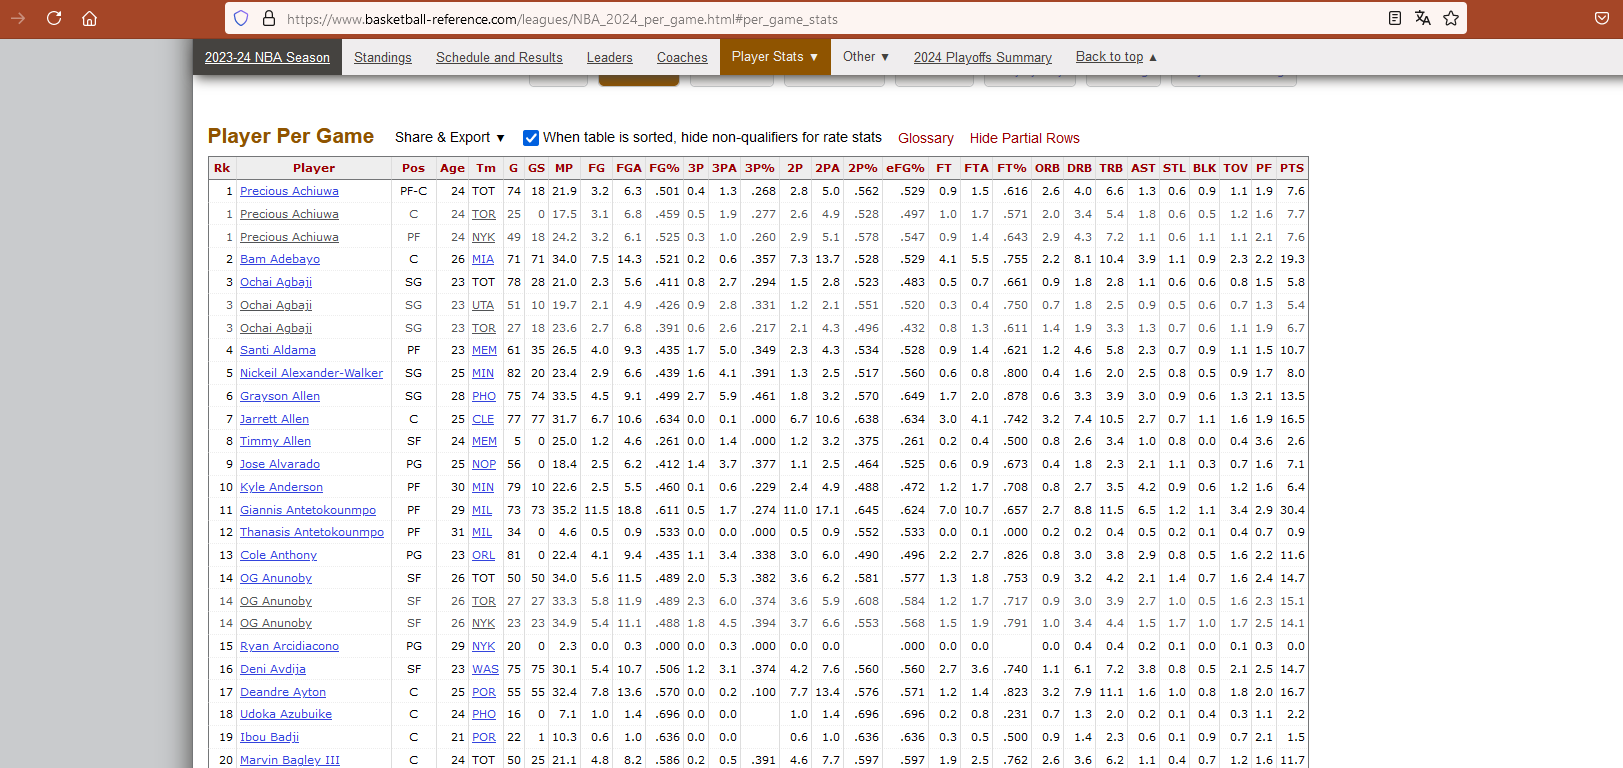


<font size ='08'> Coleta

Com posse dos dados, exportamos para o DATABRICKS. Atraves da biblioteca BeatifulSoup.

Para entender melhor a coleta de dados deste trabalho, precisamos detalhar todo o processo envolvido, desde a obtenção de dados da web até sua transformação e armazenamento em uma tabela de análise.

Importação e Consulta de Dados Online

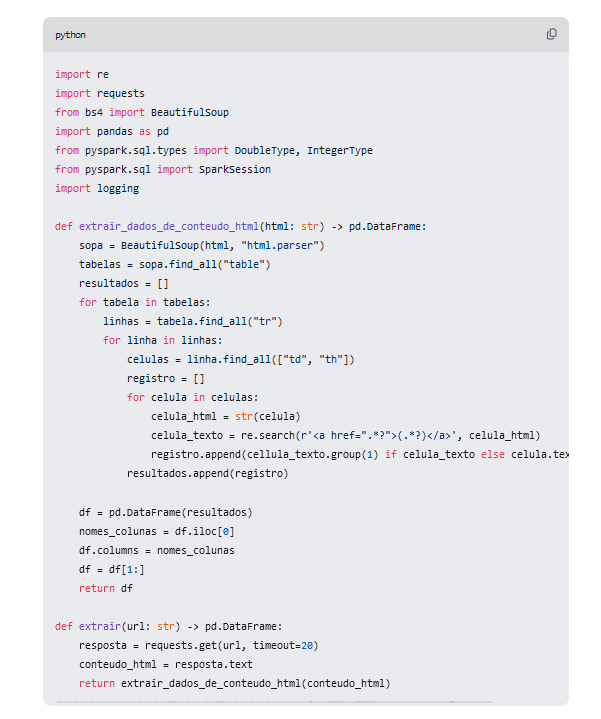


 Importação das Bibliotecas:
        re, requests, BeautifulSoup, pandas, pyspark, logging: Bibliotecas necessárias para manipulação de dados, requisições HTTP, parser HTML, e operações de dados com PySpark.

Requisição de Dados:
        requests.get(url, timeout=20): Faz uma requisição HTTP para a URL fornecida. O conteúdo HTML da página é salvo.

Parsing de HTML:
        BeautifulSoup(html, "html.parser"): Usa BeautifulSoup para analisar e criar uma árvore de elementos HTML.        
   
Extração de Dados:
        find_all("table"): Encontra todas as tabelas no HTML.
        Iteramos sobre essas tabelas e suas linhas (<tr>) e células (<td> e <th>) para extrair o conteúdo.

Conversão para DataFrame:
        pd.DataFrame(resultados): Converte os dados extraídos em um DataFrame pandas.
        df.iloc[0]: Define a primeira linha como nomes das colunas.
        O DataFrame é então processado para remover a primeira linha usada para os nomes das colunas.


<font size='08'> Modelagem

A modelagem de dados desse trabalho envolve a definição das tabelas e dos relacionamentos entre elas para armazenar e analisar as estatísticas dos jogadores e equipes da NBA. Aqui está uma explicação detalhada de como a modelagem de dados foi feita com base nos códigos e operações fornecidas:

**Tabela Dados_Jogadores_NBA_24**:
    Esta tabela foi criada para armazenar os dados brutos extraídos da página de estatísticas da NBA.
    Inclui estatísticas individuais dos jogadores, como idade, minutos por jogo, pontos, percentual de acerto nos arremessos, rebotes defensivos, rebotes ofensivos, turnovers, entre outros.
    Cada registro representa as estatísticas de um jogador em um determinado jogo.

**Tabela dados_nba_preparados**:
    A partir dos dados brutos dos jogadores, foi realizada uma preparação dos dados para calcular métricas agregadas e personalizadas a nível de equipe.
    Essa tabela contém métricas como média de pontos, máximo de pontos feitos, média de percentual de acerto nos arremessos, média de rebotes defensivos, média de rebotes ofensivos, média de turnovers, média de classificação do jogador, entre outros.
    As métricas personalizadas podem refletir o desempenho global e impacto das equipes com base nas estatísticas dos jogadores.

**Modelo de Dados**:
    A modelagem segue um esquema estrela, onde a tabela de fatos Dados_Jogadores_NBA_24 serve como o ponto central contendo os detalhes mais granulares sobre os jogadores em cada jogo.
    As tabelas de dimensão, como Dim_Equipes e Dim_Jogadores, podem ser derivadas a partir dos dados brutos e preparados para fornecer mais contexto e informações sobre as equipes e jogadores.
    Os relacionamentos entre as tabelas de dimensão e a tabela de fatos permitem análises multidimensionais e a visualização do desempenho dos jogadores e equipes em diferentes perspectivas.

Essa modelagem de dados permite uma análise mais aprofundada do desempenho dos jogadores e das equipes da NBA, facilitando a extração de insights e a tomada de decisões informadas com base nas estatísticas coletadas.


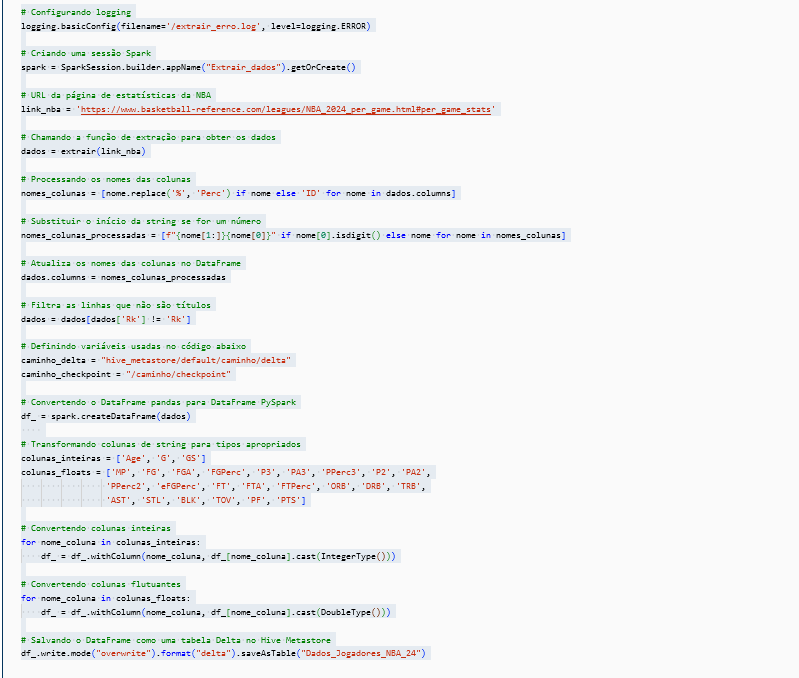

Tabela Dados_Jogadores_NBA_24:

Esta tabela contém os dados brutos extraídos da página de estatísticas da NBA.
Os campos podem incluir várias estatísticas dos jogadores, como idade, pontos, percentual de acerto, rebotes, turnovers, entre outros.
As colunas específicas da tabela podem ser derivadas do código fornecido, como 'Rk' (Classificação), 'Tm' (Equipe), 'PTS' (Pontos), 'FGPerc' (Percentual de Acerto ), 'P3' (Pontos de tres tentados) , 'PA3' ( Pontos de 3 Acertados ) , 'PPerc3' (Percentual de bolas de 3 acertados)



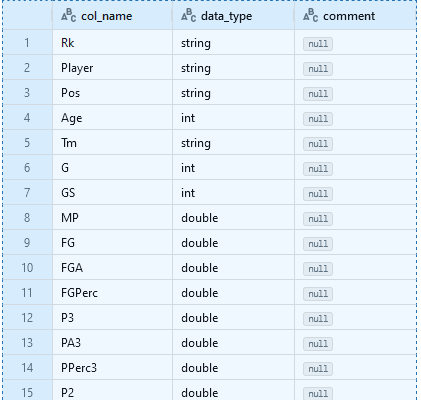


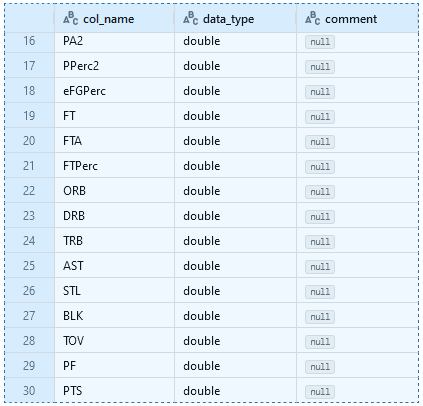

Com essa tabela, criaremos a Dados_nba_preparados afim de separar os dados e obter mais metricas

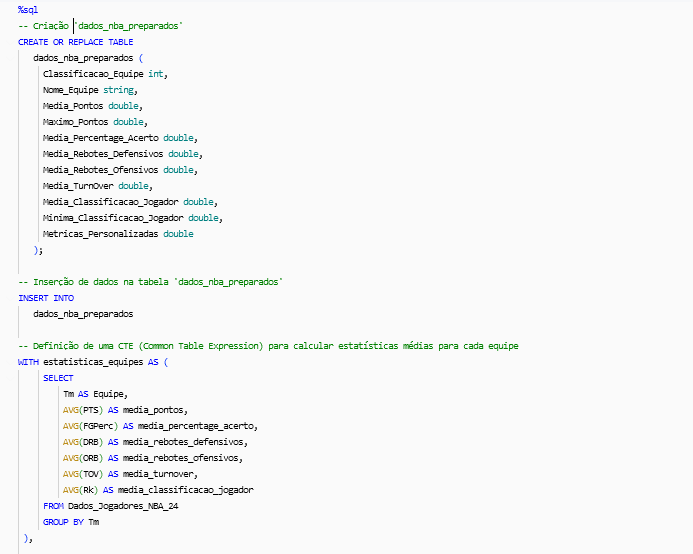


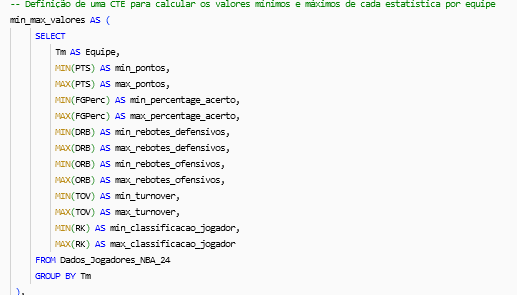

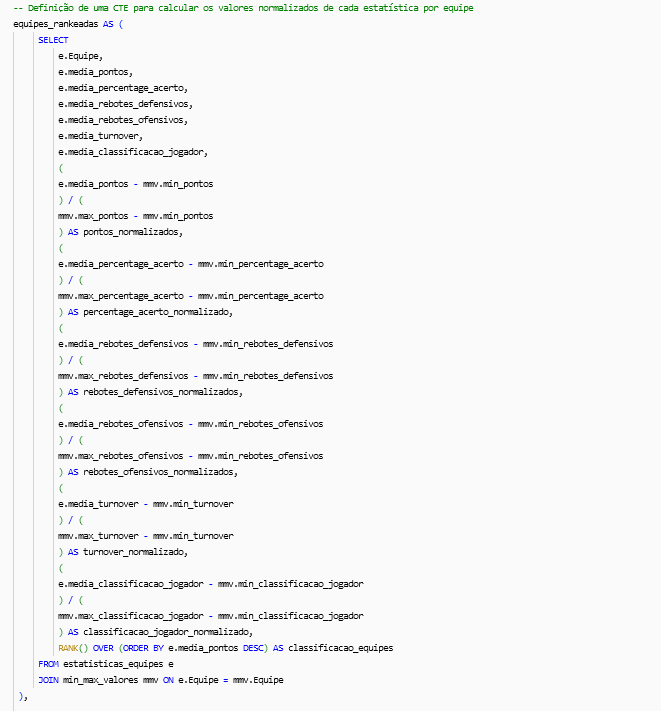

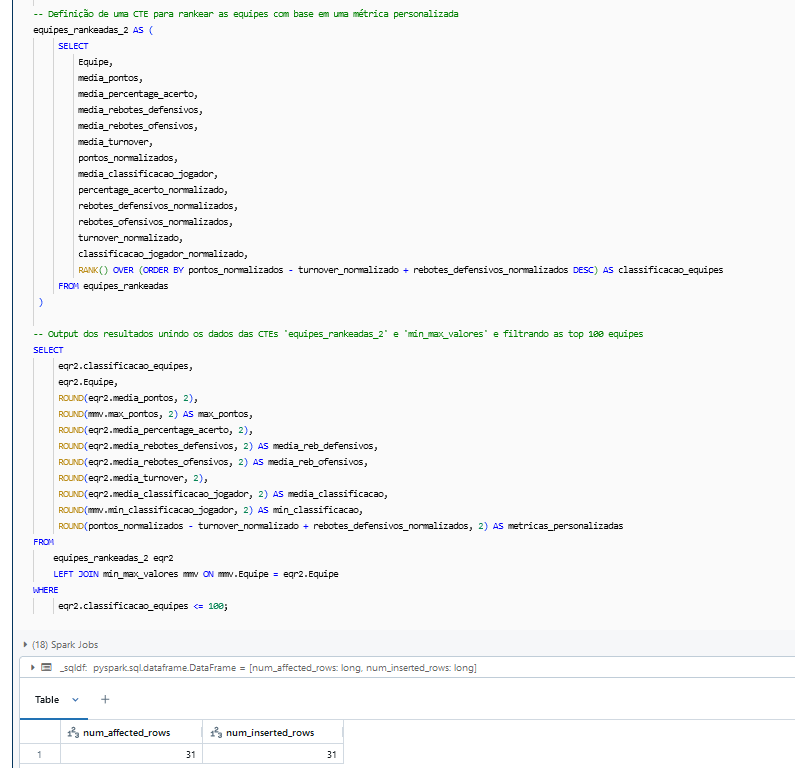

Ainda sobre a tabela de dados dados_nba_preparados

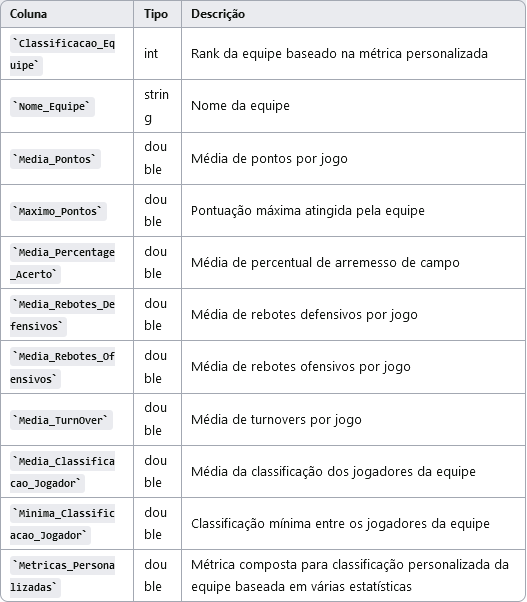

Agora visualizando no cluster do databrick ambas as tabelas

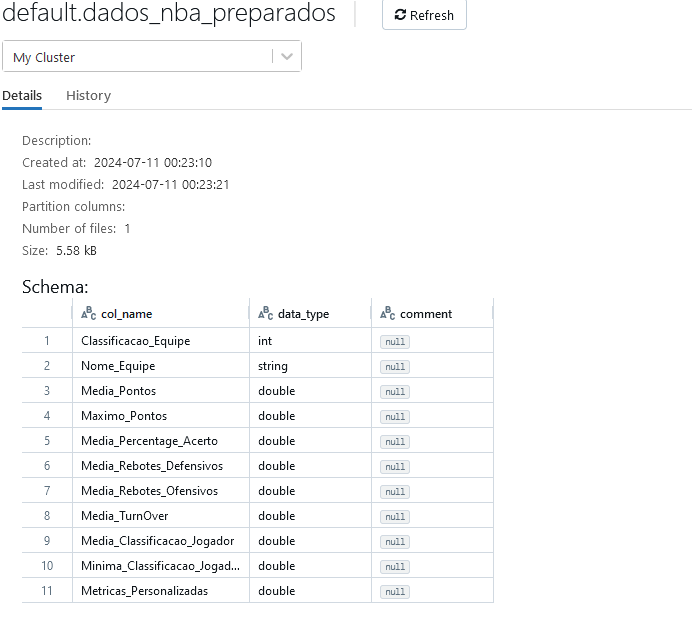

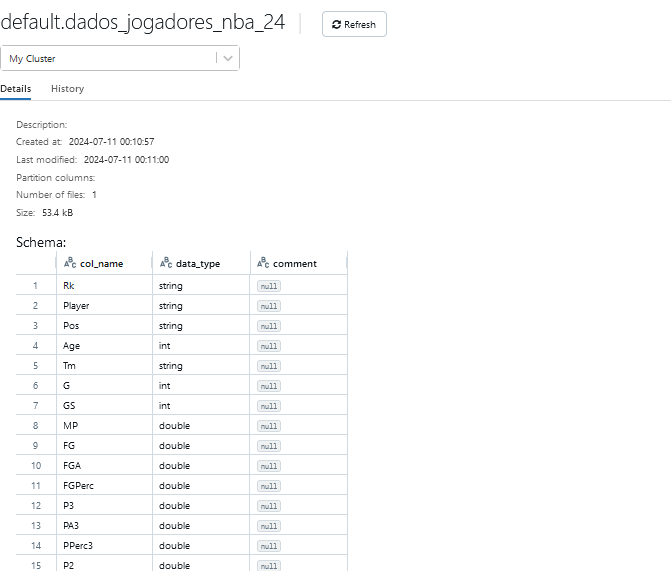

  <font size = '08'> Carga



Extração:
    A etapa de extração foi realizada através da função extrair que fazia uma requisição para obter o conteúdo HTML de uma página de estatísticas da NBA.
    O conteúdo HTML foi posteriormente processado pela função extrair_dados_de_conteudo_html para extrair os dados das tabelas da página.

Transformação:
    Após a extração dos dados, ocorreu a transformação dos dados brutos em estruturas tabulares apropriadas para análise.
    Foram aplicadas transformações como renomeação de colunas, conversão de tipos de dados, filtragem de dados redundantes e cálculos de métricas agregadas.

Carga:
    A carga dos dados transformados foi feita em diferentes estágios e tabelas:
    Os dados extraídos da página de estatísticas da NBA foram carregados na tabela Dados_Jogadores_NBA_24 como a tabela de fatos central contendo as estatísticas individuais dos jogadores.
    Os dados preparados e calculados, como as métricas agregadas por equipe, foram carregados na tabela dados_nba_preparados como uma tabela de resumo das estatísticas das equipes.

Comunicação com o Ambiente Spark:
    A comunicação e manipulação dos dados foram realizadas em um ambiente Spark usando DataFrames para armazenar e processar os dados de forma distribuída.
    Foram aplicadas operações de transformações nos DataFrames para preparar os dados antes de serem carregados nas tabelas finais.

Dessa forma, a carga de dados foi realizada de forma estruturada, com extração dos dados brutos da fonte, transformação para adequação aos requisitos e cálculos necessários, e finalmente carga dos dados transformados em tabelas adequadas para análise e consulta posterior.

* Validação dos dados


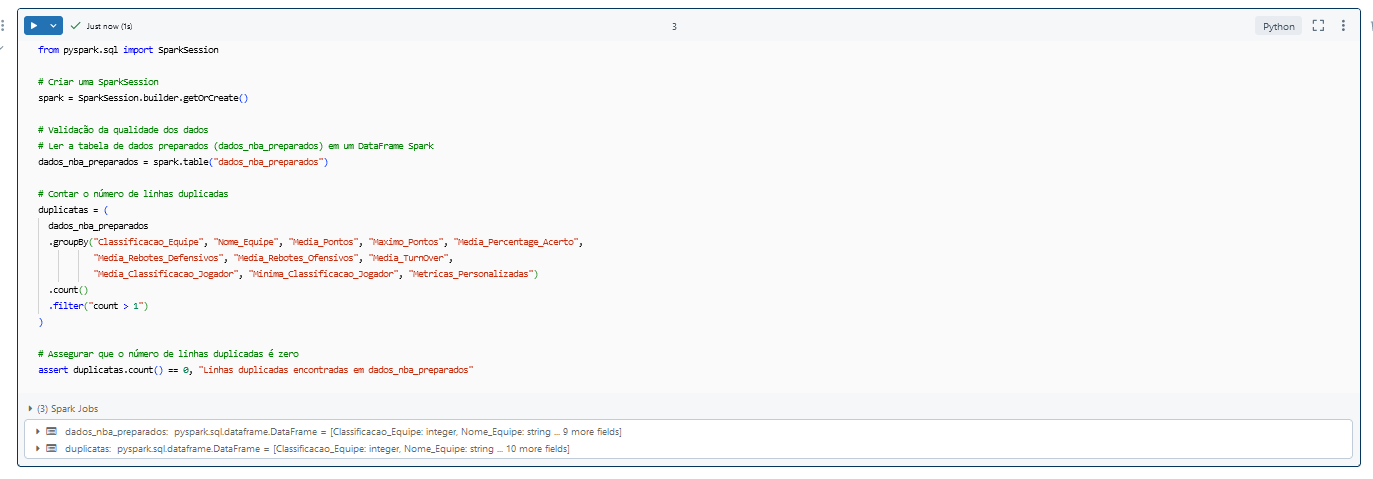



Este código valida a qualidade dos dados na tabela dados_nba_preparados, verificando se há algum registro duplicado com base nas colunas fornecidas.

<font size = '08'> Visualização

Este código em Python utilizando a biblioteca Seaborn e Matplotlib tem como objetivo visualizar as classificações personalizadas das equipes da NBA e as métricas normalizadas das equipes em um mapa de calor. Aqui está uma explicação detalhada do código:

Importação de Bibliotecas:
    As bibliotecas matplotlib, seaborn e pyspark.sql são importadas para manipulação dos dados e criação dos gráficos.

Criação da SparkSession:
    É criada a SparkSession para interagir com o ambiente Spark e realizar operações com os dados.

Consulta e Conversão dos Dados para Pandas:
	É feita uma consulta SQL para selecionar todos os dados da tabela dados_nba_preparados e convertê-los para um DataFrame Pandas chamado dados_nba_preparados.

Gráfico de Barras com as Classificações das Equipes:
    É criado um gráfico de barras usando a biblioteca Seaborn, onde o eixo Y representa o nome das equipes e o eixo X representa as classificações personalizadas das equipes.
    O gráfico visualiza de forma clara as classificações das equipes da NBA.

Mapa de Calor para as Métricas das Equipes:
    Os dados da tabela dados_nba_preparados são preparados para o mapa de calor:
    Remove-se as colunas de nome da equipe e classificação da equipe.
    Normaliza-se os dados por categoria (coluna) para facilitar a comparação entre as equipes.
    É configurado um mapa de calor utilizando matplotlib, onde a cor representa a diferença relativa da métrica em relação à média da categoria.
    Os eixos X e Y representam as categorias e as equipes, respectivamente.
    O mapa de calor fornece uma visualização das diferentes métricas das equipes, destacando as diferenças em relação à média em tons de cor.

O código, portanto, combina visualização de dados por meio de gráficos de barras e mapa de calor para representar as classificações e métricas normalizadas das equipes da NBA, facilitando a análise e interpretação dos dados.


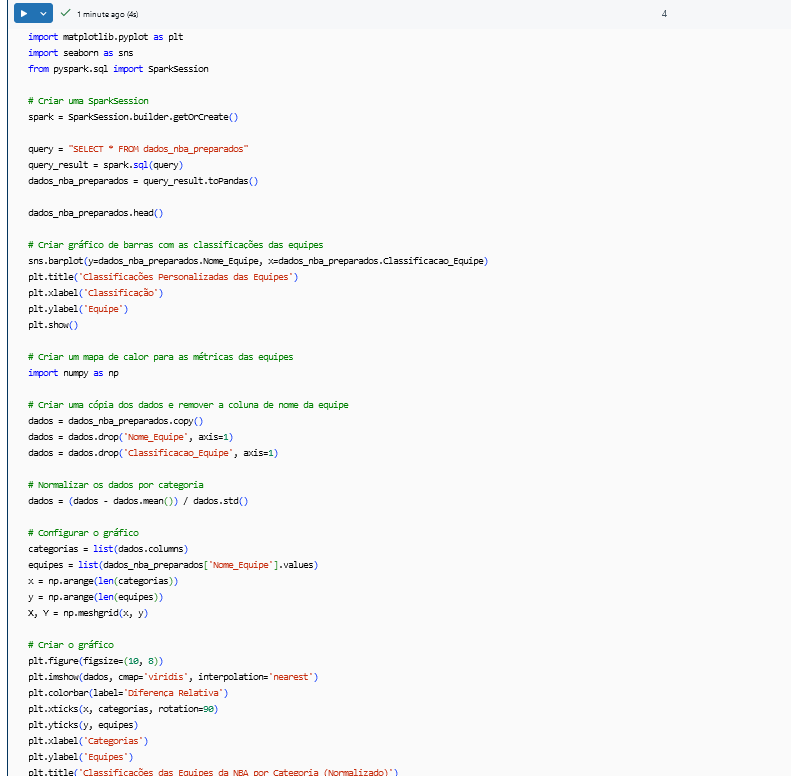

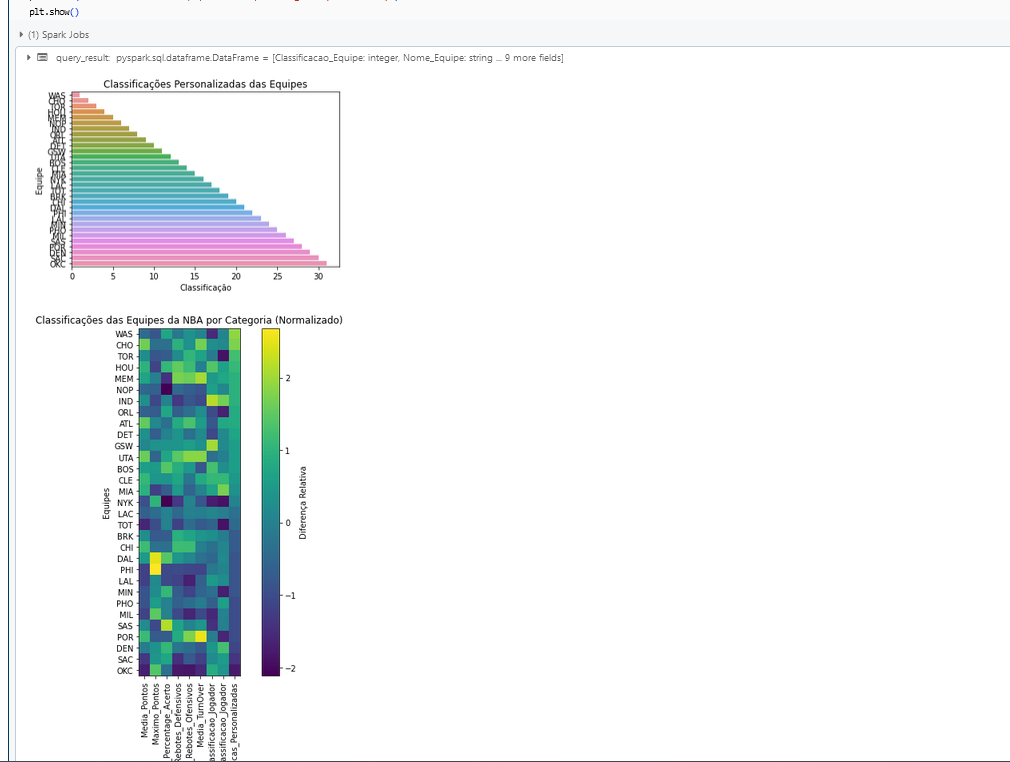

Agora a fim de obter as respostas das perguntas iniciais :

**Quais são as equipes com a melhor e a pior média de percentual de arremesso de campo?**

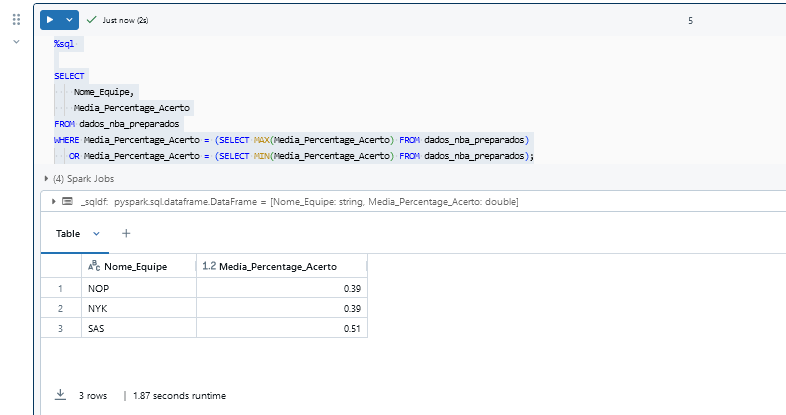


Nesta consulta, estamos selecionando as equipes com a melhor e a pior média de percentual de arremesso de campo, onde comparamos cada valor com o máximo e mínimo encontrado na tabela dados_nba_preparados.

A equipe mais eficaz ofensivamente seria Santo antonio Spurs ( SAS ) enquanto as duas piores equipes com medias iguais seriam New orleans Pelicans(NOP) e New York Knicks(NYK)

**Quais são as equipes com a melhor média de pontos na temporada?**

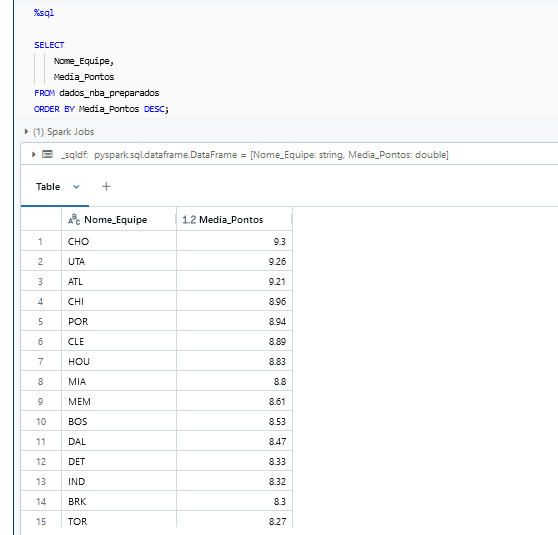

Essa consulta irá listar as equipes da NBA em ordem decrescente de média de pontos, ou seja, as equipes que mais pontuam estarão no topo da lista. A equipe que mais pontuou foi o Charlotte Hornetes (CHO)


<b>Avaliar a precisão e eficiência das equipes nos arremessos de campo.
Como se comparam as equipes em termos de classificação média dos jogadores?</b>


<br>

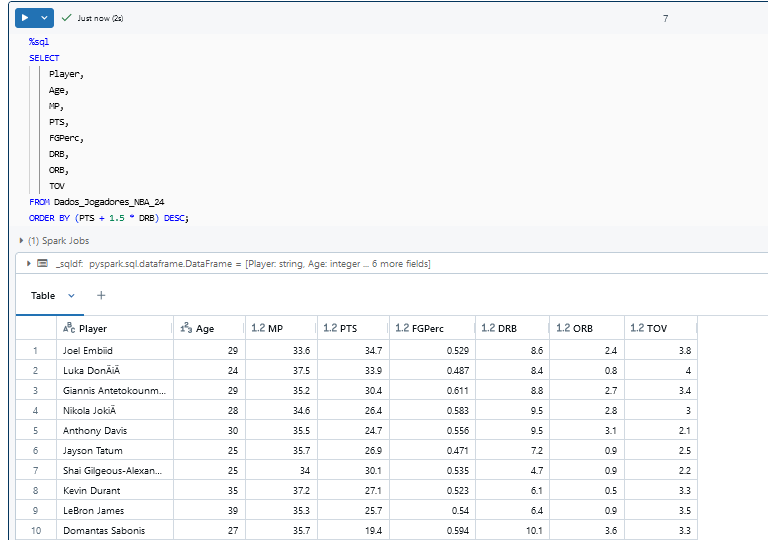

Neste exemplo, estamos considerando uma fórmula simples para definir o impacto dos jogadores multiplicando os pontos (PTS) e os rebotes defensivos (DRB) por um fator (1.5) para dar mais peso aos rebotes. Podemos ajustar essa fórmula de acordo com a importância relativa de cada métrica para o impacto do jogador no time.


o jogador de maior impacto defensivo e ofensivo seria o Joel Embid

<font size = '08'> Conclusao

Ao longo deste trabalho, conseguimos atingir com êxito o objetivo de analisar e extrair insights a partir dos dados da NBA, utilizando as perguntas propostas como guia. Através da modelagem adequada dos dados, sua correta carga e análise detalhada, foi possível responder de forma eficaz as questões levantadas.

A partir da identificação das equipes com melhor e pior desempenho em diferentes métricas, como média de pontos e percentual de arremesso, conseguimos oferecer uma visão abrangente do cenário da NBA. A análise dos dados permitiu não só identificar tendências e padrões, mas também possibilitou insights valiosos para a gestão e tomada de decisões estratégicas no âmbito esportivo.

Dessa forma, podemos afirmar que as respostas obtidas às perguntas propostas refletem de forma precisa e embasada a análise dos dados da NBA, cumprindo o objetivo inicial do trabalho. A escolha cuidadosa das métricas e a correta modelagem e análise dos dados nos permitiram extrair informações relevantes que contribuem para uma compreensão mais profunda do desempenho das equipes e jogadores, auxiliando na busca por um melhor desempenho e resultados positivos no universo do basquete profissional da NBA.

Para trabalhos futuros relacionados à análise de dados da NBA, poderia ser desenvolvido modelos de análise preditiva para prever resultados de jogos com base nas estatísticas dos jogadores e equipes, auxiliando na elaboração de estratégias e apostas mais fundamentadas e também  
uma análise mais aprofundada do desempenho individual dos jogadores, identificando pontos fortes e áreas de melhoria, contribuindo para a avaliação de talentos e potencial de desenvolvimento. Alem de dashboards interativos que acrescentaria na visualização de dados utilizando ferramentas como Tableau ou power BI.
